### Stage 4: Full evaluation of cross validated models

this notebook is only to visualize previously collected results, which should be over the whole dataset and also per split of the dataset.
Good. A previous notebook does the actual results collection. Nice.


so we have in domain and out of domain results. we have results for each cross validated split. Noice.

#### Loading all the spreadsheet data

In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
in_domain_results = os.listdir("../results/cross_validated_results/in_domain_results")
out_domain_results = os.listdir("../results/cross_validated_results/out_domain_results")

In [3]:
in_domain_results = [i for i in in_domain_results if "individual_stats" in i]
out_domain_results = [i for i in out_domain_results if "individual_stats" in i]

In [4]:
#out_domain_results

In [5]:
UNCERTAINTY_TYPES = {
    "SEnt",
    "MC-Drop",
    "Ens",
    "Evid",
    "Ind",
    "P-Unet",
    "SSN",
    "SSN-Ens",
}

In [6]:
def convert_files_to_large_df(folder, filenames):
    dfs = []
    for fn in filenames:
        df = pd.read_csv(os.path.join(folder, fn))
        if "_evidential_b" in fn:
            uncertainty_type = "Evid"
        elif "_deterministic_b" in fn:
            uncertainty_type = "SEnt"
        elif "_ind_b" in fn:
            uncertainty_type = "Ind"
        elif "_punet_b" in fn:
            uncertainty_type = "P-Unet"
        elif "_ens_b" in fn and "ssn" not in fn:
            uncertainty_type = "Ens"
        elif "_mc_drop_b" in fn:
            uncertainty_type = "MC-Drop"
        elif "_ssn_ens_b" in fn:
            uncertainty_type = "SSN-Ens"
        elif "_ssn_b" in fn:
            uncertainty_type = "SSN"
        else:
            print("uncertainty type unclear for ", fn)
            continue
            
        cv_fold = fn.split("_")[-3][-1]
        
        df['uncertainty_type'] = [uncertainty_type for _ in range(len(df))]
        df['cv_fold'] = [cv_fold for _ in range(len(df))]
        
        dfs.append(df)
    
    return pd.concat(dfs, ignore_index=False)

In [7]:
in_domain_df = convert_files_to_large_df("../results/cross_validated_results/in_domain_results", in_domain_results)
out_domain_df = convert_files_to_large_df("../results/cross_validated_results/out_domain_results", out_domain_results)

uncertainty type unclear for  ssn_prehead16_rank15_sdice0_individual_stats.csv


In [10]:
out_domain_df[out_domain_df['uncertainty_type'] == "SEnt"][['sample_vd_skew', 'cv_fold']].values.size

600

In [11]:
(len(out_domain_df))/(8*5)

61.5

In [12]:
out_domain_df.loc[out_domain_df['model_name'].str.contains("evid")]['cv_fold'].value_counts()

cv_fold
0    60
1    60
4    60
2    60
5    60
3    60
Name: count, dtype: int64

In [13]:
in_domain_df

,Unnamed: 0,dice,hd95,avd,recall,f1,rmse,gt_vols,best_dice,best_avd,...,mean_cov_mean_missed_lesions3d_all_0.68,mean_size_missed_lesions3d_all_0.68,prop_lesions_missed3d_all_0.68,mean_missed_area3d_all_0.69,mean_cov_mean_missed_lesions3d_all_0.69,mean_size_missed_lesions3d_all_0.69,prop_lesions_missed3d_all_0.69,model_name,uncertainty_type,cv_fold
0,0,0.665964,5.907567,26.031164,0.363636,0.500000,0.567932,1091.0,0.669448,2.291476,...,0.118575,3.606060,0.750000,0.044509,0.030250,3.571429,0.795455,ssn_ens0_cv4,SSN-Ens,4
1,1,0.868424,1.414214,7.640083,0.746479,0.755931,0.468476,22094.0,0.867557,0.076944,...,0.155661,5.714286,0.492958,0.064746,0.057017,7.358975,0.549296,ssn_ens0_cv4,SSN-Ens,4
2,2,0.686528,2.236068,2.861314,0.750000,0.731707,0.621004,3425.0,0.672329,3.036496,...,0.058242,7.100000,0.357143,0.052110,0.014286,7.100000,0.357143,ssn_ens0_cv4,SSN-Ens,4
3,3,0.778188,8.000000,8.747563,0.512195,0.624535,0.535745,4104.0,0.768556,0.414230,...,0.070040,11.240000,0.609756,0.035935,0.029037,12.296296,0.658537,ssn_ens0_cv4,SSN-Ens,4
4,4,0.739799,2.236068,14.150721,0.614035,0.700678,0.570984,4233.0,0.716972,2.126152,...,0.043718,6.562500,0.561404,0.050720,0.019385,6.562500,0.561404,ssn_ens0_cv4,SSN-Ens,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,37,0.762633,2.236068,35.700230,0.324324,0.375000,0.573767,12703.0,0.789156,3.125246,...,0.102679,2.549020,0.689189,0.070863,0.066468,2.574074,0.729730,ssn_ens0_cv0,SSN,0
38,38,0.571064,15.076464,34.971910,0.175000,0.282569,0.585280,1424.0,0.583846,4.213483,...,0.028075,9.882353,0.850000,0.019456,0.020053,9.882353,0.850000,ssn_ens0_cv0,SSN,0
39,39,0.808555,2.000000,1.098174,0.533333,0.567026,0.544144,15116.0,0.811068,2.494046,...,0.049824,8.478261,0.511111,0.047765,0.021596,9.360000,0.555556,ssn_ens0_cv0,SSN,0
40,40,0.724053,8.166959,12.290970,0.551724,0.609183,0.548396,4784.0,0.719792,2.612876,...,0.028169,10.750000,0.620690,0.034828,0.008230,10.750000,0.620690,ssn_ens0_cv0,SSN,0


In [14]:
in_domain_df.keys()

Index(['Unnamed: 0', 'dice', 'hd95', 'avd', 'recall', 'f1', 'rmse', 'gt_vols',
       'best_dice', 'best_avd',
       ...
       'mean_cov_mean_missed_lesions3d_all_0.68',
       'mean_size_missed_lesions3d_all_0.68', 'prop_lesions_missed3d_all_0.68',
       'mean_missed_area3d_all_0.69',
       'mean_cov_mean_missed_lesions3d_all_0.69',
       'mean_size_missed_lesions3d_all_0.69', 'prop_lesions_missed3d_all_0.69',
       'model_name', 'uncertainty_type', 'cv_fold'],
      dtype='object', length=587)

<Axes: xlabel='uncertainty_type', ylabel='dice'>

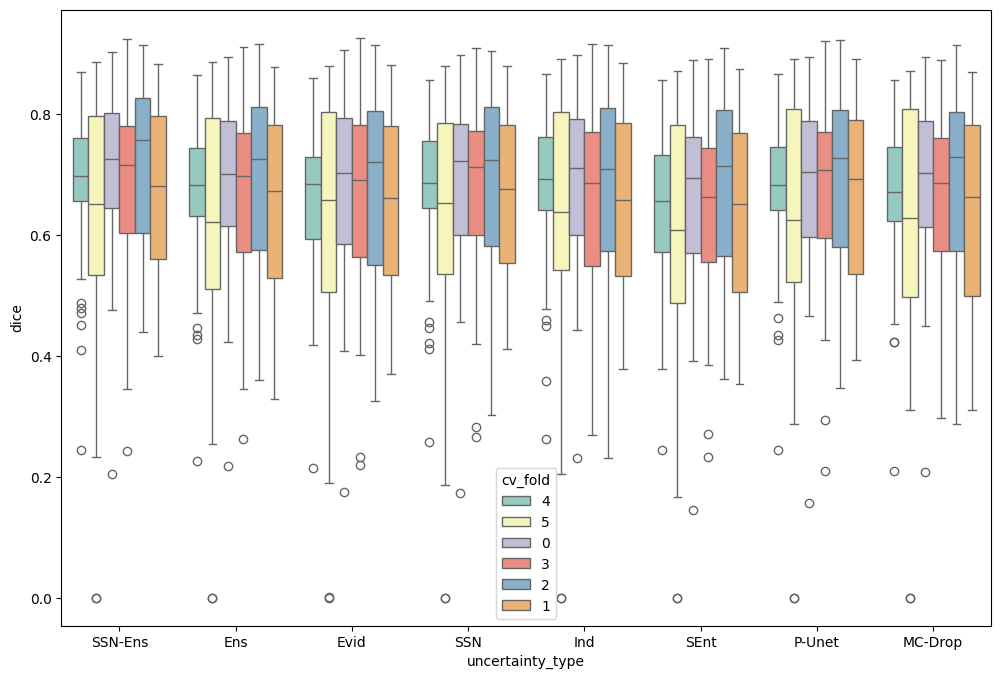

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='uncertainty_type', y='dice', data=in_domain_df, hue='cv_fold', palette='Set3')


<Axes: xlabel='uncertainty_type', ylabel='dice'>

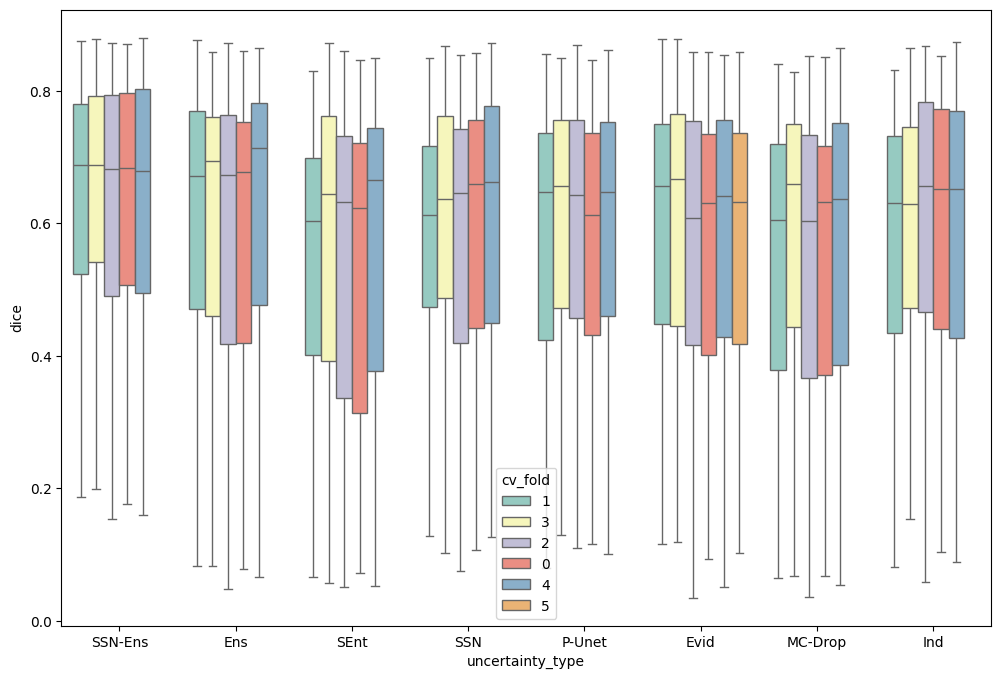

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='uncertainty_type', y='dice', data=out_domain_df, hue='cv_fold', palette='Set3')

In [17]:
pd.set_option('display.float_format',
      lambda x: '{:,.3f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))

In [40]:
from scipy.stats import t as t_distribution
def mean_and_95_conf_over_cvfold(df, metric):
    cv_scores = df.groupby(['uncertainty_type', 'cv_fold'])[metric].mean().groupby('uncertainty_type')
    mean = cv_scores.mean().rename(f"{metric} mean", axis='index')
    std = cv_scores.std(ddof=1)
    size = cv_scores.size()
    sem_value = std / (np.sqrt(size))
    
    confidence_level = 0.95
    degrees_of_freedom = size - 1
    margin_of_error = t_distribution.ppf((1 + confidence_level) / 2, degrees_of_freedom) * sem_value
    margin_of_error = margin_of_error.rename(f"{metric} 95%")
    sem_value  = sem_value.rename(f"{metric} 95%")
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    
    return pd.concat([mean, sem_value], axis=1)#, confidence_interval[0], confidence_interval[1]], axis=1)

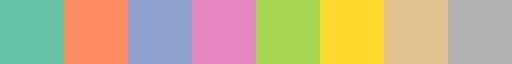

In [41]:
import matplotlib as mpl 
mpl.colormaps['Set2']

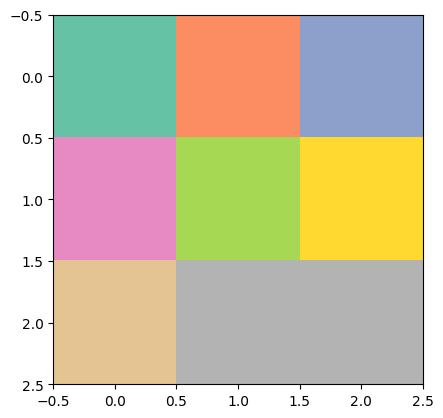

In [42]:
plt.imshow(np.arange(9).reshape(3,3), cmap='Set2')

In [43]:
from matplotlib import font_manager

In [44]:
font_dir = ['/home/s2208943/fonts/Libre_Baskerville']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

In [45]:
#font_manager.findfont("EB_Garamond", directory='/home/s2208943/fonts')

In [46]:
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties
fm.fontManager.addfont('/home/s2208943/fonts/Libre_Baskerville/LibreBaskerville-Bold.ttf')
prop = FontProperties(fname="/home/s2208943/fonts/Libre_Baskerville/LibreBaskerville-Bold.ttf")

In [10]:
# cmap = ['g', 'r', 'b', 'black', 'orange', 'purple', 'cyan', 'yellow']
import matplotlib as mpl
cmap = mpl.colormaps['Set2']
UNCERTAINTY_COLOURS = {
    'Ens':cmap(0),
    'Evid':cmap(1),
    'Ind':cmap(2),
    'MC-Drop':cmap(3),
    'P-Unet':cmap(4),
    'SEnt':cmap(5),
    'SSN':cmap(6),
    'SSN-Ens':cmap(7),
}

In [48]:
def UEO_at_point(df, get_max=True, at_value=None, max_value=0.7):
    thresholds = np.arange(0, max_value, 0.01)
    column_names = []
    threshold_means = []
    for t in thresholds:
        threshold_means.append(df.groupby(['uncertainty_type', 'cv_fold'])[f"UEO_{t:.2f}"].mean())
        column_names.append(f"UEO_{t:.2f}")
    column_names = np.array(column_names)
    threshold_means = pd.concat(threshold_means, axis=1)
    threshold_cv_means = threshold_means.groupby(['uncertainty_type']).mean()
    
    # find the value on the mean UEO curve that is closest to the target value
    threshold_cv_means = threshold_means.groupby(['uncertainty_type']).mean()
    closest_idx = (threshold_cv_means - at_value).abs().apply(np.argmin, axis=1)
    closest_value = threshold_cv_means.values[np.arange(len(threshold_cv_means)), closest_idx.values]
    
    result_df = pd.DataFrame(closest_idx)
    result_df['ueo_value'] = closest_value
    result_df['threshold'] = thresholds[closest_idx.values]
    
    return result_df
    

In [91]:
def plot_metric_for_all_thresholds_95(ax, df, metric, ylim=None, xlim=None, title="", ax_title="", marker_point=None, ylabel=None):
    thresholds = np.arange(0, 0.7, 0.01)
    dfs = []
    # get a mean and conf interval for these curves.
    for tau in thresholds:
        dfs.append(mean_and_95_conf_over_cvfold(df, f"{metric}_{tau:.2f}"))
    tmetric_df = pd.concat(dfs, axis=1)
    
    mean_cols = [f"{metric}_{tau:.2f} mean" for tau in thresholds]
    conf_cols = [f"{metric}_{tau:.2f} 95%" for tau in thresholds]
    
    for key in UNCERTAINTY_TYPES:
        mean = tmetric_df[mean_cols].loc[key].values
        conf = tmetric_df[conf_cols].loc[key].values
        sns.lineplot(x=thresholds, y=mean, label=key, color=UNCERTAINTY_COLOURS[key], ax=ax, linewidth=4)
        ax.fill_between(thresholds, mean - conf, mean + conf, alpha=0.3, color=UNCERTAINTY_COLOURS[key])
        
        if marker_point is not None:
            # print("here")
            # print(marker_point.loc[key]['threshold'], marker_point.loc[key]['ueo_value'])
            ax.scatter(marker_point.loc[key]['threshold'], mean[int(marker_point.loc[key][0])], s=100, 
                       color=UNCERTAINTY_COLOURS[key], zorder=3, edgecolors='black')
    
    ax.legend(loc="best", fontsize=14, prop=prop)

    # Create the grid 
    ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
    ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)
    
    # Remove the spines
    ax.spines[['top','right','bottom']].set_visible(False)

    # Make the left spine thicker
    ax.spines['left'].set_linewidth(1.3)

    # Reformat x-axis label and tick labels
    ax.set_xlabel(r"uncertainty threshold $\tau$", fontsize=14, labelpad=10, fontname=font) # No need for an axis label
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

    # Reformat y-axis
    if ylabel == None:
        ylabel = metric
    ax.set_ylabel(ylabel, fontsize=14, labelpad=10, fontname=font)
    ax.yaxis.set_label_position("left")
    ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    
    # Add in red line and rectangle on top
    ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
    #ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

    # Add in title and subtitle
    if title:
        ax.text(x=0.05, y=.94, s=title, transform=fig.transFigure, ha='left', fontsize=18, weight='bold', alpha=.8, fontname=font)
    #ax.text(x=0.05, y=.90, s="Focus on the current 5 richest countries from 1973 to 2022", transform=ax.transData, ha='left', fontsize=12, alpha=.8, **hfont)
    ax.set_title(ax_title, fontsize=14, fontname=font)
    
    # remove the little x tick line
    ax.tick_params(axis='x', which='both', bottom=False, top=False)#, fontname='Times New Roman', fontweight='bold')
    
    for tick in ax.get_xticklabels():
        tick.set_fontname(font)
        # tick.set_fontweight("bold")
    for tick in ax.get_yticklabels():
        tick.set_fontname(font)
        # tick.set_fontweight("bold")

In [92]:
font = "Libre Baskerville"

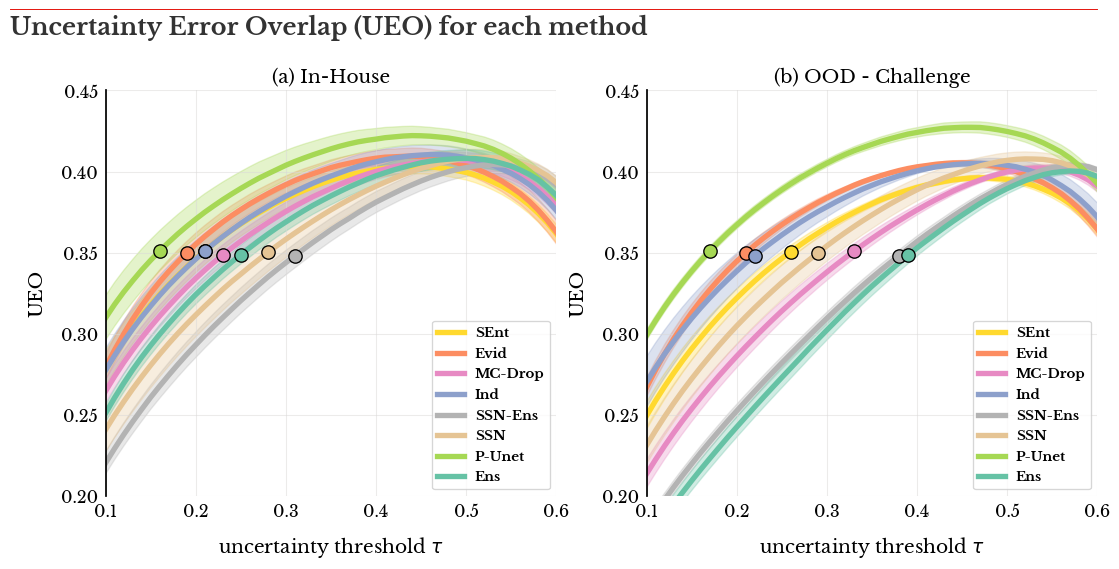

In [93]:
at_value = 0.35
dpi = 96
figsize=(13.33,6.5)
metric = "UEO"
title = "Uncertainty Error Overlap (UEO) for each method"
fig, axs = plt.subplots(ncols=2, figsize=figsize, dpi = dpi)
plot_metric_for_all_thresholds_95(axs[0], in_domain_df, metric, 
                        marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), ylim=(0.2, 0.45), xlim=(0.1, 0.6), title=title, ax_title="(a) In-House")


plot_metric_for_all_thresholds_95(axs[1], out_domain_df, metric,
                                  marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.6), ylim=(0.2, 0.45), xlim=(0.1, 0.6), ax_title="(b) OOD - Challenge")

# Set a white background
fig.patch.set_facecolor('white')
# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)
plt.show()

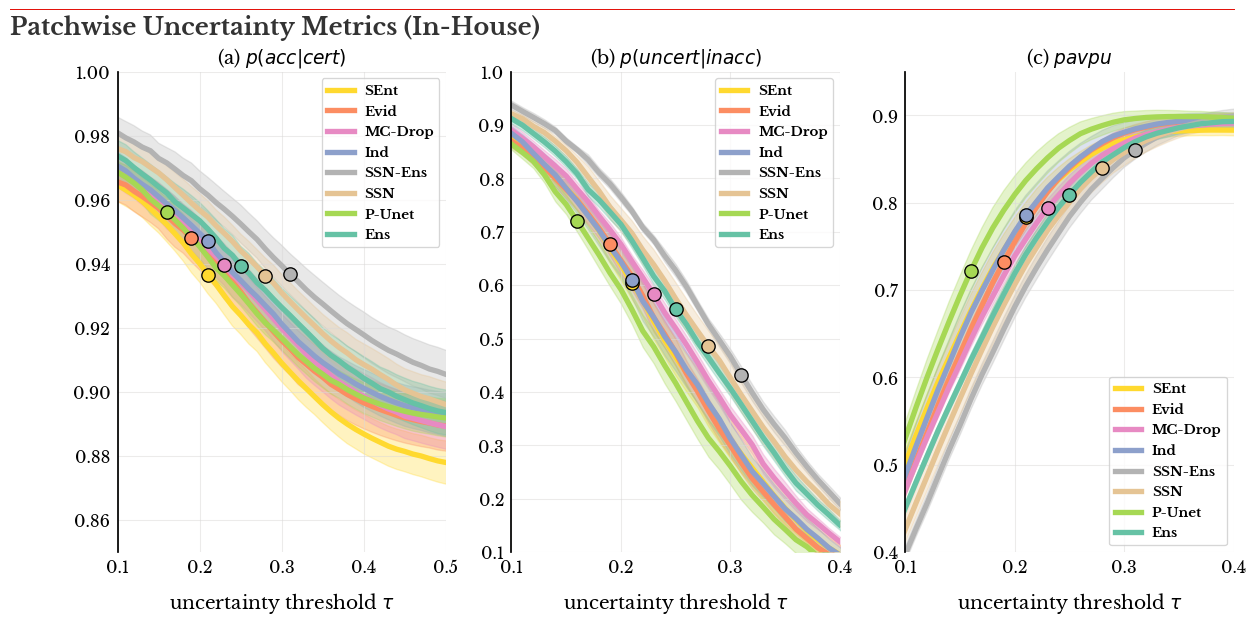

In [94]:
fig, axs = plt.subplots(ncols=3, figsize=(15,6.5), dpi = dpi)

metric = "p_acc_cert"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[0], in_domain_df, metric, (0.85, 1), 
    title="Patchwise Uncertainty Metrics (In-House)", ax_title = r"(a) $p(acc|cert)$", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.5)
)

metric = "p_uncert_inacc"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[1], in_domain_df, metric, (0.1, 1), ax_title= r"(b) $p(uncert|inacc)$", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.4)
)

metric = "pavpu"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[2], in_domain_df, metric, (0.4, 0.95), ax_title = "(c) $pavpu$", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.4),
)

# plt.tight_layout()


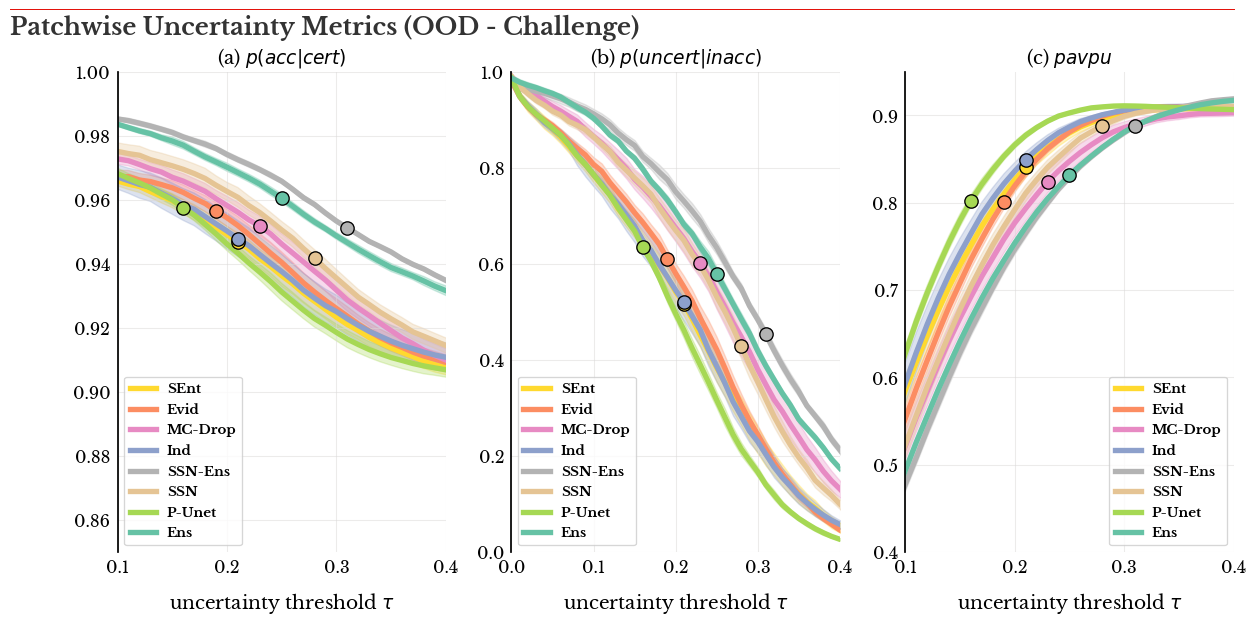

In [95]:
fig, axs = plt.subplots(ncols=3, figsize=(15,6.5), dpi = dpi)

metric = "p_acc_cert"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[0], out_domain_df, metric, (0.85, 1), title="Patchwise Uncertainty Metrics (OOD - Challenge)",
    ax_title = r"(a) $p(acc|cert)$", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.4)
)

metric = "p_uncert_inacc"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[1], out_domain_df, metric, (0.0, 1), ax_title = r"(b) $p(uncert|inacc)$", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.,0.4)
)

metric = "pavpu"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[2], out_domain_df, metric, (0.4, 0.95), ax_title = r"(c) $pavpu$", ylabel="", 
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.4),
)

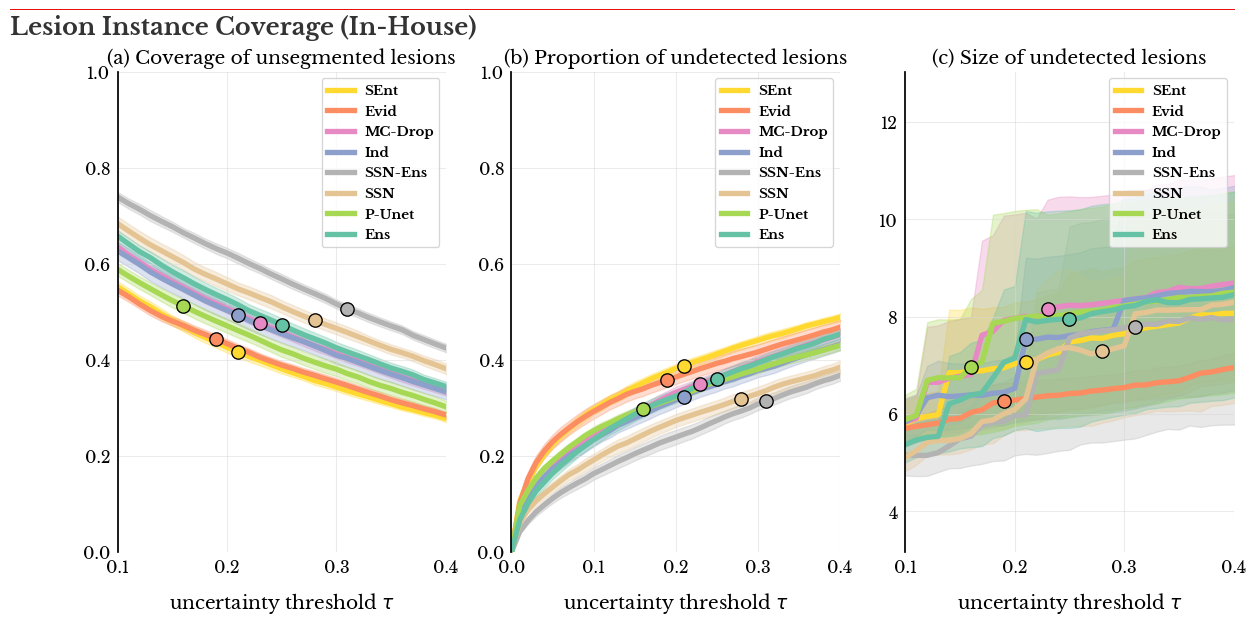

In [98]:
fig, axs = plt.subplots(ncols=3, figsize=(15,6.5), dpi = dpi)

metric = "mean_cov_mean_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[0], in_domain_df, metric, (0., 1), title="Lesion Instance Coverage (In-House)",
    ax_title="(a) Coverage of unsegmented lesions", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.4)
)

metric = "prop_lesions_missed3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[1], in_domain_df, metric, (0.0, 1), ax_title="(b) Proportion of undetected lesions", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.,0.4)
)

metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[2], in_domain_df, metric, ax_title="(c) Size of undetected lesions", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.4),
)


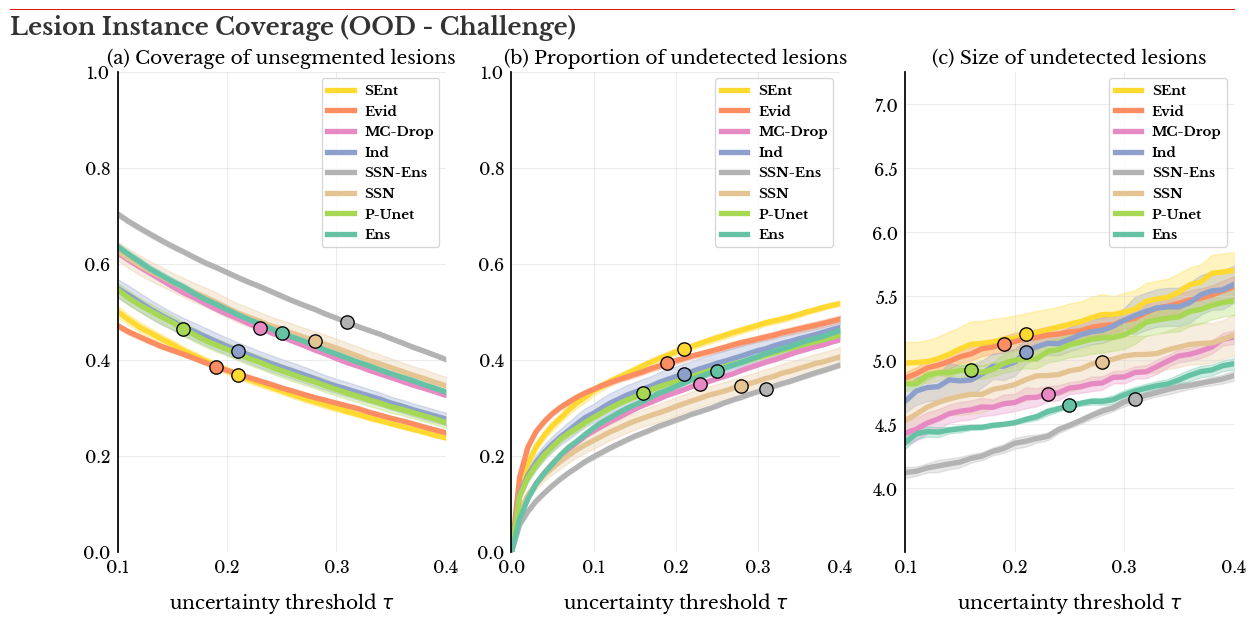

In [99]:
fig, axs = plt.subplots(ncols=3, figsize=(15,6.5), dpi = dpi)

metric = "mean_cov_mean_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[0], out_domain_df, metric, (0., 1), title="Lesion Instance Coverage (OOD - Challenge)", 
    ax_title="(a) Coverage of unsegmented lesions", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.4)
)

metric = "prop_lesions_missed3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[1], out_domain_df, metric, (0.0, 1), ax_title="(b) Proportion of undetected lesions", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.,0.4)
)

metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[2], out_domain_df, metric, ax_title="(c) Size of undetected lesions", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.4),
)


### How to explain the tables
say that each metric is the mean value, and then the confidence value is over the folds

for the ueo dots explain that they are the points found on the training data, to see how such a threshold would generalize. Nonetheless we note that the UEO disparity is greater between the methods, in the event of access to a GT oracle to the set threshold, we may see that P-Unet yields stronger performance.

In [363]:
dfs = []
for key in ["dice", "best_dice", "avd", "best_avd", "recall", "f1"]:
    dfs.append(mean_and_95_conf_over_cvfold(in_domain_df, key))
standard_metrics_df = pd.concat(dfs, axis=1)
standard_metrics_df

,dice mean,dice 95%,best_dice mean,best_dice 95%,avd mean,avd 95%,best_avd mean,best_avd 95%,recall mean,recall 95%,f1 mean,f1 95%
uncertainty_type,,,,,,,,,,,,
Ens,0.658,0.031,0.671,0.029,30.144,5.169,11.450,5.645,0.427,0.025,0.511,0.030
Evid,0.657,0.025,NaN,NaN,30.347,4.584,NaN,NaN,0.499,0.048,0.502,0.021
Ind,0.663,0.026,0.665,0.026,30.628,5.605,29.359,5.160,0.510,0.042,0.537,0.027
MC-Drop,0.654,0.032,0.671,0.030,29.933,5.565,13.633,5.595,0.452,0.043,0.510,0.033
P-Unet,0.666,0.026,0.670,0.024,29.946,4.975,24.022,2.301,0.541,0.036,0.540,0.025
SEnt,0.642,0.030,NaN,NaN,32.442,7.012,NaN,NaN,0.457,0.028,0.490,0.032
SSN,0.667,0.025,0.690,0.025,30.698,7.797,7.037,3.178,0.529,0.042,0.543,0.036
SSN-Ens,0.680,0.031,0.694,0.029,28.720,5.410,5.943,3.818,0.510,0.027,0.561,0.030


In [51]:
dfs = []
for key in ["dice", "best_dice", "avd", "best_avd", "recall", "f1"]:
    dfs.append(mean_and_95_conf_over_cvfold(out_domain_df, key))
standard_metrics_df = pd.concat(dfs, axis=1)
standard_metrics_df

,dice mean,dice 95%,best_dice mean,best_dice 95%,avd mean,avd 95%,best_avd mean,best_avd 95%,recall mean,recall 95%,f1 mean,f1 95%
uncertainty_type,,,,,,,,,,,,
Ens,0.593,0.012,0.603,0.008,100.535,13.611,37.810,7.759,0.419,0.014,0.402,0.009
Evid,0.578,0.012,NaN,NaN,109.110,14.819,NaN,NaN,0.489,0.024,0.382,0.020
Ind,0.588,0.023,0.590,0.024,95.059,27.107,92.817,26.718,0.494,0.069,0.410,0.024
MC-Drop,0.550,0.023,0.572,0.024,151.182,25.585,90.022,24.291,0.464,0.016,0.357,0.026
P-Unet,0.580,0.022,0.589,0.025,104.433,21.603,84.675,24.586,0.522,0.009,0.400,0.040
SEnt,0.550,0.019,0.643,NaN,131.288,15.072,3.775,NaN,0.444,0.021,0.344,0.020
SSN,0.583,0.014,0.625,0.015,118.348,25.862,41.595,21.170,0.525,0.045,0.398,0.011
SSN-Ens,0.628,0.004,0.652,0.006,69.484,9.499,15.657,3.648,0.492,0.012,0.461,0.011


In [52]:
dfs = []
for key in ["rmse", "best_rmse", "sUEO", "GED^2"]:
    dfs.append(mean_and_95_conf_over_cvfold(in_domain_df, key))
uncert_metrics_df = pd.concat(dfs, axis=1)
uncert_metrics_df

,rmse mean,rmse 95%,best_rmse mean,best_rmse 95%,sUEO mean,sUEO 95%,GED^2 mean,GED^2 95%
uncertainty_type,,,,,,,,
Ens,0.572,0.012,0.551,0.013,0.455,0.015,0.696,0.040
Evid,0.574,0.012,NaN,NaN,0.461,0.012,NaN,NaN
Ind,0.563,0.017,0.562,0.017,0.463,0.019,0.933,0.040
MC-Drop,0.569,0.010,0.549,0.011,0.458,0.015,0.770,0.039
P-Unet,0.579,0.020,0.566,0.019,0.477,0.016,0.920,0.029
SEnt,0.575,0.015,NaN,NaN,0.456,0.013,NaN,NaN
SSN,0.566,0.014,0.542,0.018,0.452,0.023,0.702,0.019
SSN-Ens,0.564,0.014,0.539,0.016,0.442,0.019,0.637,0.036


In [53]:
dfs = []
for key in ["rmse", "best_rmse", "sUEO", "GED^2"]:
    dfs.append(mean_and_95_conf_over_cvfold(out_domain_df, key))
uncert_metrics_df = pd.concat(dfs, axis=1)
uncert_metrics_df

,rmse mean,rmse 95%,best_rmse mean,best_rmse 95%,sUEO mean,sUEO 95%,GED^2 mean,GED^2 95%
uncertainty_type,,,,,,,,
Ens,0.579,0.012,0.542,0.008,0.403,0.014,0.701,0.019
Evid,0.601,0.012,NaN,NaN,0.454,0.003,NaN,NaN
Ind,0.588,0.024,0.587,0.024,0.454,0.003,1.083,0.060
MC-Drop,0.588,0.021,0.562,0.023,0.433,0.010,0.861,0.033
P-Unet,0.619,0.009,0.597,0.018,0.477,0.007,1.079,0.059
SEnt,0.593,0.016,0.521,NaN,0.442,0.005,0.768,NaN
SSN,0.595,0.020,0.561,0.018,0.448,0.020,0.838,0.047
SSN-Ens,0.577,0.006,0.538,0.006,0.413,0.008,0.664,0.009


### Per individual volume plots

In [23]:
def plot_metric_per_volume(df, utype, metric, scatter=False):
    rdf = df[df['uncertainty_type'] == utype][['gt_vols',metric, 'cv_fold']].groupby(['gt_vols'])
    x = rdf['gt_vols'].mean().values
    # print(x)
    y = rdf[metric].mean().values
    x = x[~np.isnan(y)]  * 0.003
    y = y[~np.isnan(y)]
    
    if scatter:
        plt.scatter(x, y, c=UNCERTAINTY_COLOURS[utype])
    
    # fit linear model
    num_pts = len(x)
    m, b = np.linalg.lstsq(np.vstack([np.log(x), np.ones(num_pts)]).T, y, rcond=None)[0]

    # plot regression line
    x = np.sort(x)
    y_pred = m*np.log(x) + b
    plt.plot(x, y_pred, color=UNCERTAINTY_COLOURS[utype], label=utype)
    # print(y_pred)
    plt.xscale('log')
    plt.xlabel('GT WMH Volume')
    plt.ylabel(metric)

In [44]:
### todo: I should give an R^2 value. NICE love it, thank you, bye.

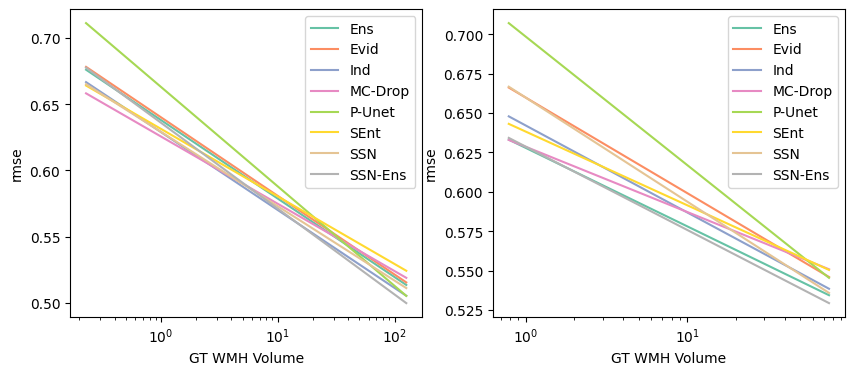

In [25]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for key in UNCERTAINTY_COLOURS.keys():
    plot_metric_per_volume(in_domain_df, key, "rmse", scatter=False)
plt.legend();

plt.subplot(1,2,2)
for key in UNCERTAINTY_COLOURS.keys():
    plot_metric_per_volume(out_domain_df, key, "rmse", scatter=False)
plt.legend();

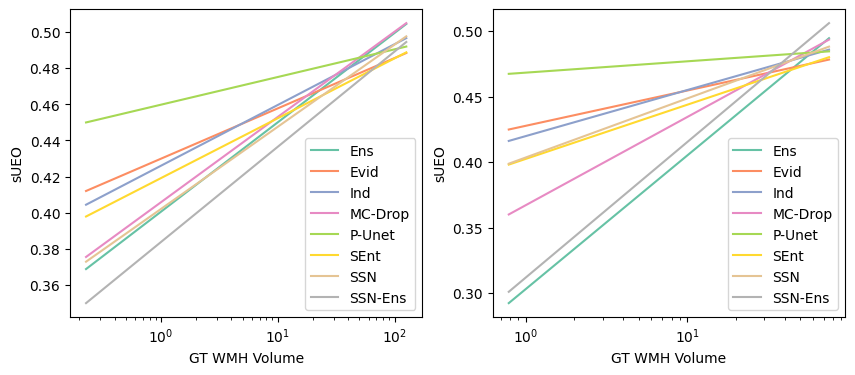

In [26]:
# ah so we see that sUEO is not the best measure here, high sUEO has low calibration.
metric = "sUEO"
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for key in UNCERTAINTY_COLOURS.keys():
    plot_metric_per_volume(in_domain_df, key, metric, scatter=False)
plt.legend();

plt.subplot(1,2,2)
for key in UNCERTAINTY_COLOURS.keys():
    plot_metric_per_volume(out_domain_df, key, metric, scatter=False)
plt.legend();

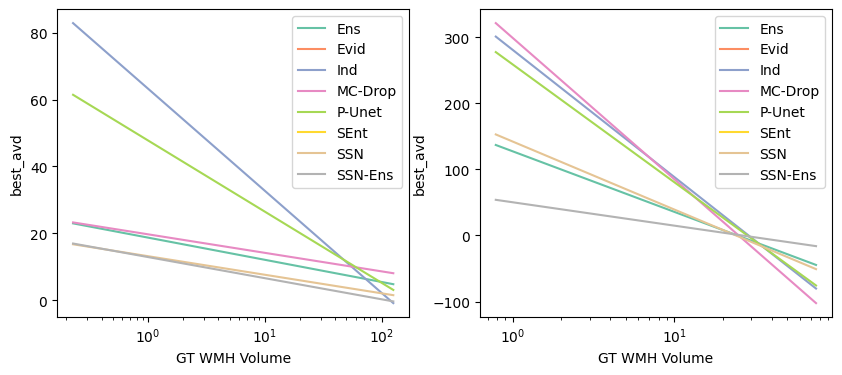

In [27]:
metric = "best_avd"
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for key in UNCERTAINTY_COLOURS.keys():
    plot_metric_per_volume(in_domain_df, key, metric, scatter=False)
plt.legend();

plt.subplot(1,2,2)
for key in UNCERTAINTY_COLOURS.keys():
    plot_metric_per_volume(out_domain_df, key, metric, scatter=False)
plt.legend();

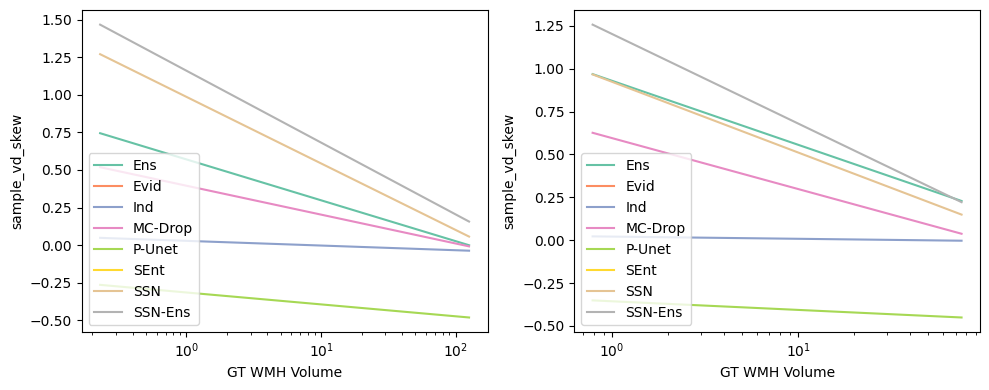

In [28]:
metric = "sample_vd_skew"
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for key in UNCERTAINTY_COLOURS.keys():
    plot_metric_per_volume(in_domain_df, key, metric, scatter=False)
plt.legend();

plt.subplot(1,2,2)
for key in UNCERTAINTY_COLOURS.keys():
    plot_metric_per_volume(out_domain_df, key, metric, scatter=False)
plt.legend();
plt.tight_layout()

In [33]:
def sample_div_plot(df, uncertainty_type, merge_folds=False, ymax=400):
    model_df = df[df['uncertainty_type'] == uncertainty_type]
    
    model_df = model_df[['gt_vols', 'cv_fold', 'sample_0_vd',
               'sample_1_vd', 'sample_2_vd', 'sample_3_vd', 'sample_4_vd',
               'sample_5_vd', 'sample_6_vd', 'sample_7_vd', 'sample_8_vd',
               'sample_9_vd']]

    if merge_folds:
        model_df = model_df.groupby(['gt_vols', 'cv_fold']).mean().groupby(['gt_vols']).mean()
        vols = model_df.index
    else:
        vols = model_df['gt_vols']
        model_df = model_df.drop(columns=['gt_vols', 'cv_fold'], inplace=False)

    values = model_df.values
    sorted_vols_idx = np.argsort(vols)
    values = values[sorted_vols_idx]
    values = values.T
    
    plt.figure(figsize=(15, 2))
    plt.boxplot(values)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.ylabel(f"Volume Difference %")
    # plt.yscale('log')
    plt.ylim((-100, ymax))
    plt.xlabel("Individuals, sorted by WMH Volume")
    
    plt.axhline(y=0, color='r')

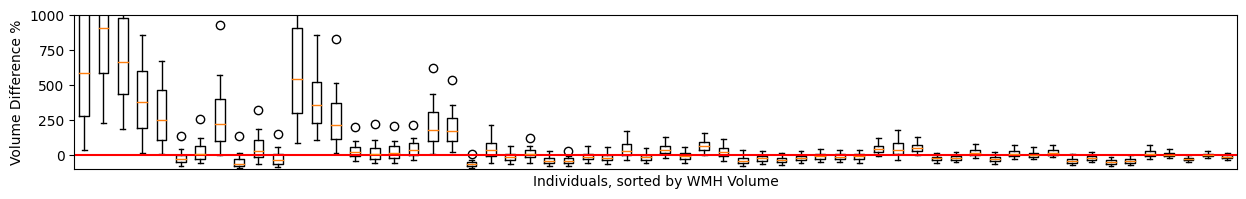

In [34]:
sample_div_plot(out_domain_df, "SSN-Ens", True, 1000)

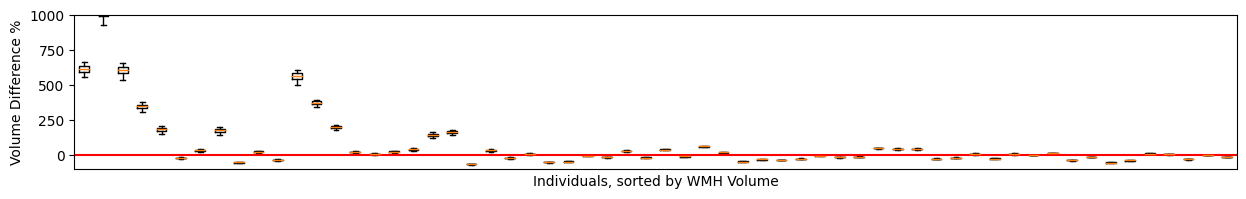

In [35]:
sample_div_plot(out_domain_df, "P-Unet", True, 1000)

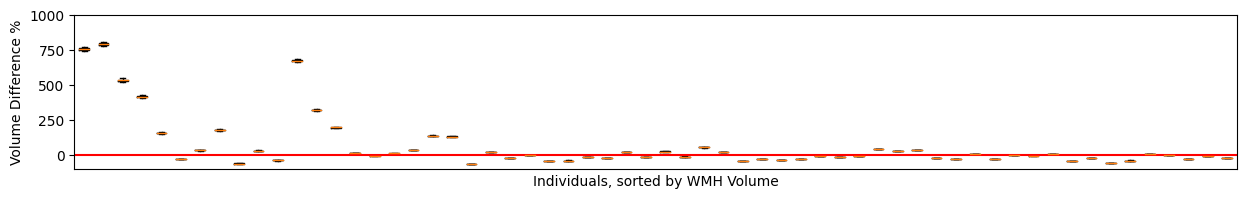

In [43]:
sample_div_plot(out_domain_df, "Ind", True, 1000)

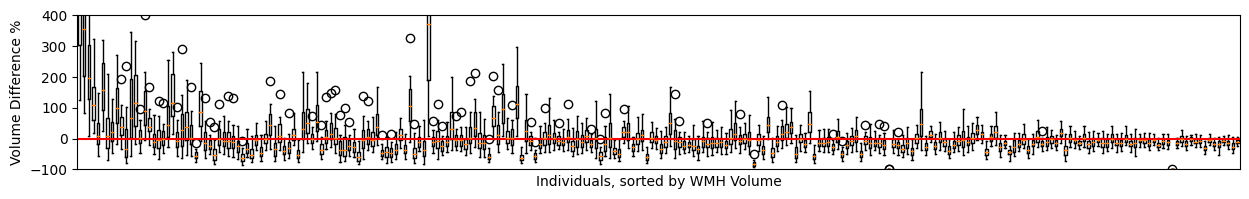

In [36]:
sample_div_plot(in_domain_df, "SSN-Ens")

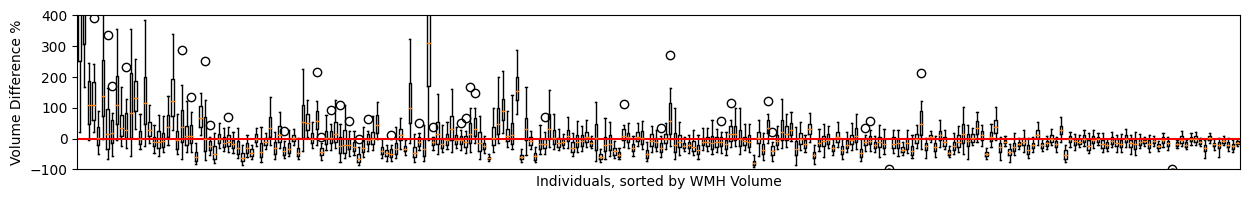

In [37]:
sample_div_plot(in_domain_df, "SSN")

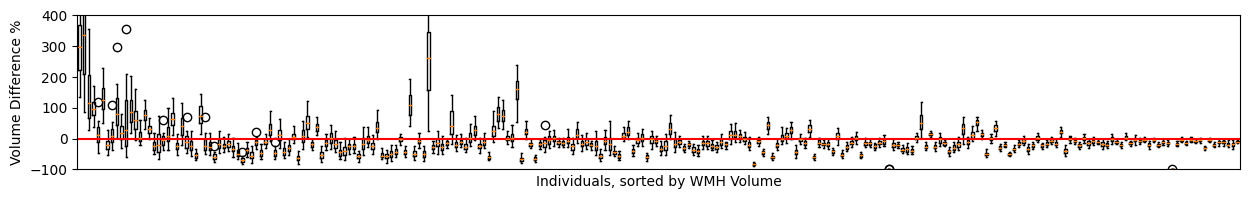

In [38]:
sample_div_plot(in_domain_df, "Ens")

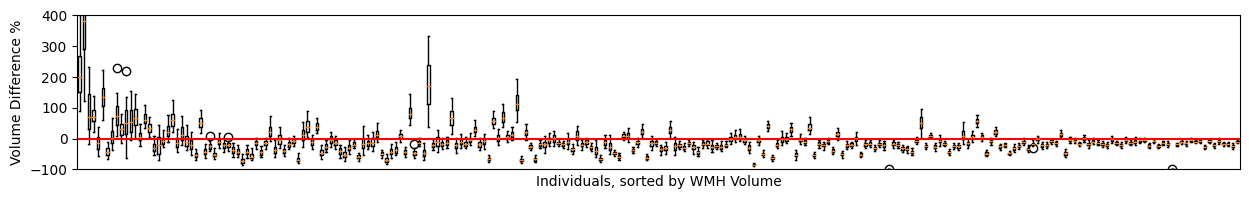

In [39]:
sample_div_plot(in_domain_df, "MC-Drop")

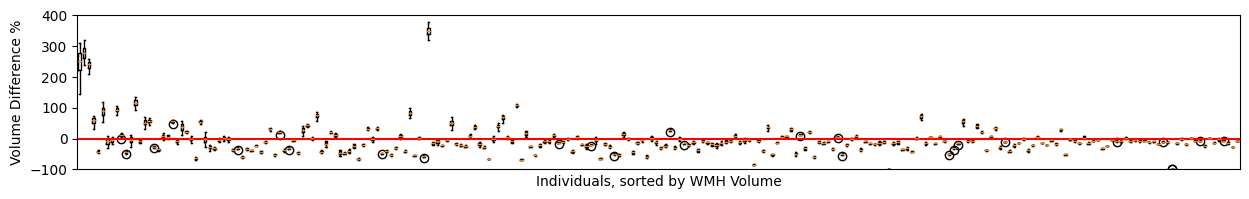

In [40]:
sample_div_plot(in_domain_df, "P-Unet")

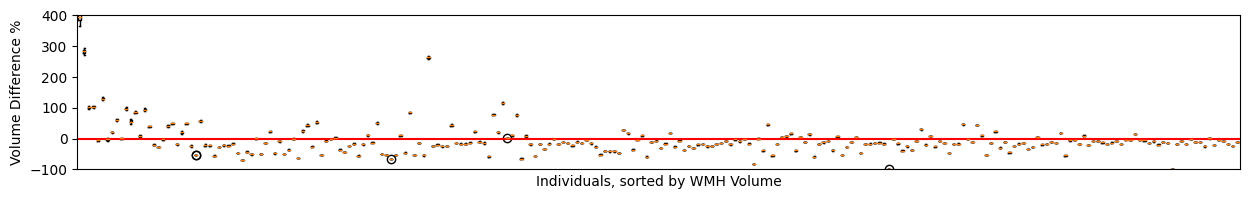

In [41]:
sample_div_plot(in_domain_df, "Ind")

In [660]:
in_domain_df[(in_domain_df['uncertainty_type']=='P-Unet') & (in_domain_df['dice'] < 0.2)]

,Unnamed: 0,dice,hd95,avd,recall,f1,rmse,gt_vols,best_dice,best_avd,...,mean_cov_mean_missed_lesions3d_all_0.68,mean_size_missed_lesions3d_all_0.68,prop_lesions_missed3d_all_0.68,mean_missed_area3d_all_0.69,mean_cov_mean_missed_lesions3d_all_0.69,mean_size_missed_lesions3d_all_0.69,prop_lesions_missed3d_all_0.69,model_name,uncertainty_type,cv_fold
0,0,0.000,NaN,100.000,0.000,0.000,0.284,"9,240.000",0.000,100.000,...,0.000,146.667,1.000,0.000,0.000,146.667,1.000,punet_cv5,P-Unet,5
12,12,0.000,87.795,99.979,0.000,0.000,0.511,"24,140",0.000,99.979,...,0.000,349.855,1.000,0.000,0.000,349.855,1.000,punet_cv5,P-Unet,5
25,25,0.157,8.246,397.857,0.232,0.150,0.715,"2,333.000",0.163,319.546,...,0.007,12.500,0.821,0.000,0.004,12.500,0.821,punet_cv0,P-Unet,0


In [663]:
np.isnan(in_domain_df['rmse'].values).sum()

5

In [664]:
in_domain_df.loc[np.isnan(in_domain_df['rmse'].values)]

,Unnamed: 0,dice,hd95,avd,recall,f1,rmse,gt_vols,best_dice,best_avd,...,mean_cov_mean_missed_lesions3d_all_0.68,mean_size_missed_lesions3d_all_0.68,prop_lesions_missed3d_all_0.68,mean_missed_area3d_all_0.69,mean_cov_mean_missed_lesions3d_all_0.69,mean_size_missed_lesions3d_all_0.69,prop_lesions_missed3d_all_0.69,model_name,uncertainty_type,cv_fold
0,0,0.000,NaN,100.000,0.000,0.000,NaN,"9,240.000",0.000,98.009,...,0.000,146.667,1.000,0.000,0.000,146.667,1.000,ens0_cv5,Ens,5
12,12,0.000,NaN,100.000,0.000,0.000,NaN,"24,140",0.000,99.983,...,0.000,349.855,1.000,0.000,0.000,349.855,1.000,ens0_cv5,Ens,5
0,0,0.000,NaN,100.000,0.000,0.000,NaN,"9,240.000",0.001,97.976,...,0.000,146.667,1.000,0.000,0.000,146.667,1.000,ssn_ens0_cv5,SSN-Ens,5
12,12,0.000,NaN,100.000,0.000,0.000,NaN,"24,140",0.001,99.644,...,0.000,349.855,1.000,0.000,0.000,349.855,1.000,ssn_ens0_cv5,SSN-Ens,5
12,12,0.000,NaN,100.000,0.000,0.000,NaN,"24,140",0.000,99.996,...,0.000,349.855,1.000,0.000,0.000,349.855,1.000,mcdrop_all_0.1_cv5,MC-Drop,5


### Results generating and Plotting left to do
- [x] URGENT: fix the problem with the dfs not loading properly (sample stuff in the SEnt rows....)
- [x] run experiment to get missing result for sent in domain
- [ ] collect the number of samples experiment in domain and out of domain
- [ ] create a new slurm script for the a40 gpus only to run the above with.
- [x] order the samples in terms of dice and reorder to see how that affects best dice and rmse. Nice. No, we can't know dice at test time. Ah but it might still be interesting anyway.....
- [ ] see how best dice and best avd is affected as the number of samples increases (a separate experiment here).
- [x] replace best dice with the dice attained by the best dice samples put together. That makes a lot more sense and will make SSN Ens stand out more.
- [ ] what happens as I increase the number of samples? (e.g rerun the analysis with 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 samples...)
- [x] modify code to be able to collect cv5 for the Challenge dataset. Noice.
- [ ] find for which methods there are individuals with extremely low dice (broken image) and remove them from the analysis.
- [ ] collect cv5 for the challenge dataset
- [ ] do the line plots with points, side by side for comparison, as opposed to avoiding putting the points.
- [ ] add the dashed line that miguel recommends to the proportion of missed lesions plot.
- [x] fix evid
- [x] plot sample div skew
- [ ] try using sample diversity as a metric for predicting fazekas, just that on top of clinical values. Then when that is done, compare to using all the features.
- [ ] put the dice values for SSN Ens into the deterministic model when doing the quality control experiment, so that we can make a comparison? (and go vice versa).
- [x] can GED be > 1 ? (yes it can)
- [x] fix why the rmse is sometimes nan.
- [ ] provide a visual example that shows why P-Unet will have a better sUEO but a worse calibration for a low volume individual. Find the lowest volume and demonstrate.
- [x] sample VD per volume
- [x] fix the fact that SEnt has some sample based values in the out_domain dataframe...
- [x] rmse per volume
- [ ] estimate the brier score, accuracy, precision of the fazekas models for reporting and confidence intervals in each. NOICE. show confusion matrices.
- [ ] repeat fazekas experiment for multiple runs of the uncertainty maps...
- [ ] rmse of the avereage sample (for ssn, ssn_ens, punet, etc)
- [x] is pavpu broken? ssn ens has higher p_acc_cert and p_uncert_inacc but lower pavpu? No, its just pavpu denominator contains p_au, which is higher for SSN Ens
    so it's distribution is less tight around the mistakes, so preferences are based on desired outcome for uncertainty.
- [x] plot the covereage metrics as maximum UEO for each method (actually I've gone for UEO at a specific point).
- [ ] provide some visual examples of the differences.
- [ ] get some images that visualise the sample diversity on offer. Nice. maybe do some image crops? I like that.
- [ ] make the plots look beautiful please.

In [666]:
out_domain_df.to_csv("out_domain_df.csv")